In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
heart = pd.read_csv('/home/bmatore/projects/mlbookcamp-code/data/heart_cleveland_upload.csv')

In [19]:
heart.shape

(297, 14)

In [3]:
heart.head().T

,0,1,2,3,4
age,69.0,69.0,66.0,65.0,64.0
sex,1.0,0.0,0.0,1.0,1.0
cp,0.0,0.0,0.0,0.0,0.0
trestbps,160.0,140.0,150.0,138.0,110.0
chol,234.0,239.0,226.0,282.0,211.0
fbs,1.0,0.0,0.0,1.0,0.0
restecg,2.0,0.0,0.0,2.0,2.0
thalach,131.0,151.0,114.0,174.0,144.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,0.1,1.8,2.6,1.4,1.8


In [4]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [9]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [13]:
features =  list(heart.iloc[:, 0:13].columns)

In [14]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

<AxesSubplot:xlabel='condition', ylabel='count'>

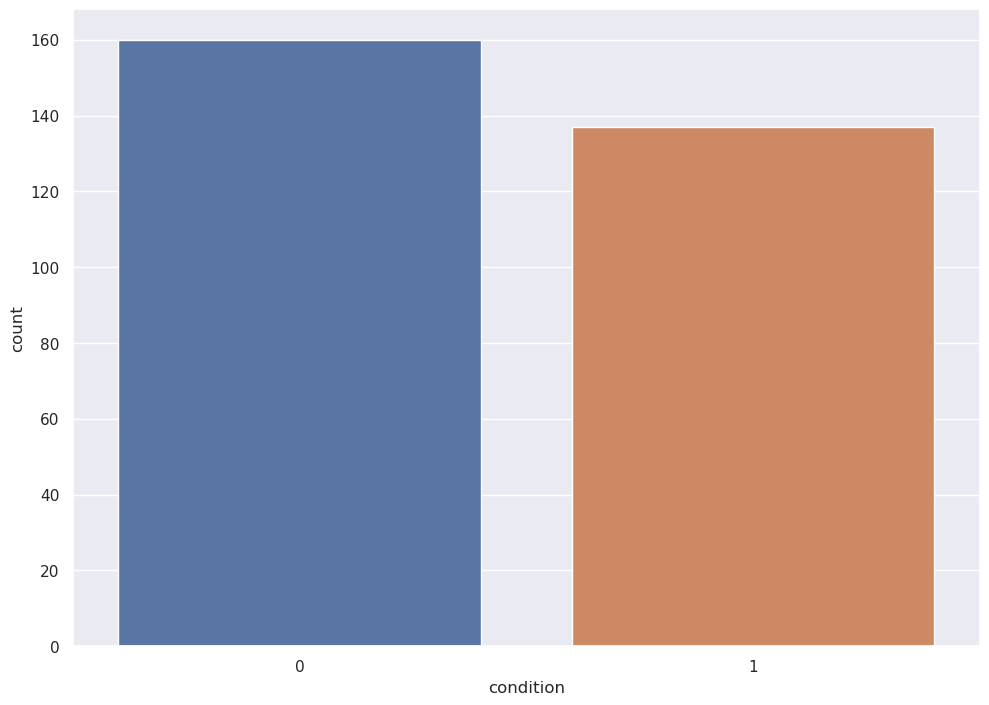

In [7]:
sns.countplot(data = heart, x = 'condition')

In [20]:
X = heart.drop(['condition'], axis = 1)
y = heart['condition'].values

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [23]:
print(y)

[0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0
 1]


In [28]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 :", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
run_experiment(model)

R^2 : 0.06249999999999989
MAE : 0.23333333333333334
RMSE: 0.48304589153964794


In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
run_experiment(model)

R^2 : 0.2857142857142857
MAE : 0.17777777777777778
RMSE: 0.4216370213557839


In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
run_experiment(model)

R^2 : -0.3392857142857144
MAE : 0.3333333333333333
RMSE: 0.5773502691896257
